# GMM(Gaussian Mixture Model)

In [3]:
import os
import numpy as np
import matplotlib.pyplot as plt

path = "old_faithful.txt"
xs = np.loadtxt(path)
xs.shape, xs[0]

((272, 2), array([ 3.6, 79. ]))

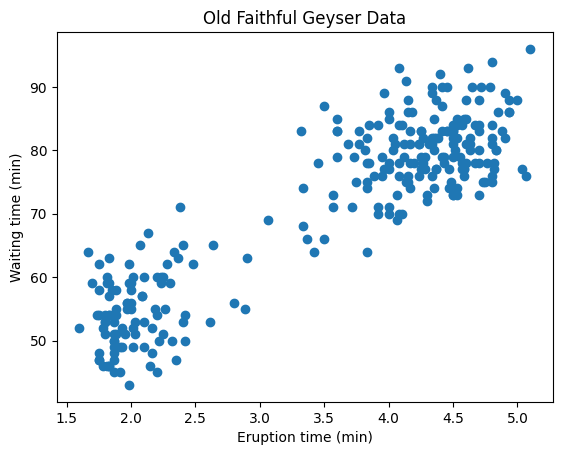

In [4]:
plt.scatter(xs[:, 0], xs[:, 1])
plt.xlabel("Eruption time (min)")
plt.ylabel("Waiting time (min)")
plt.title("Old Faithful Geyser Data")
plt.show()

In [5]:
# 2개의 정규 분포 준비 -> 임의의 확률분포에 따라 두 분포 중 하나를 선택 -> 선택된 분포에서 샘플을 생성
import numpy as np
mus = np.array([[2, 54.50], [4.3, 80.0]])
covs = np.array([[[.07, .44], [.44, 33.7]], [[.17, .94], [.94, 36.0]]])
phis = np.array([.35, .65])

def sample():
    z = np.random.choice(2, p=phis)
    mu, cov = mus[z], covs[z]
    return np.random.multivariate_normal(mu, cov)

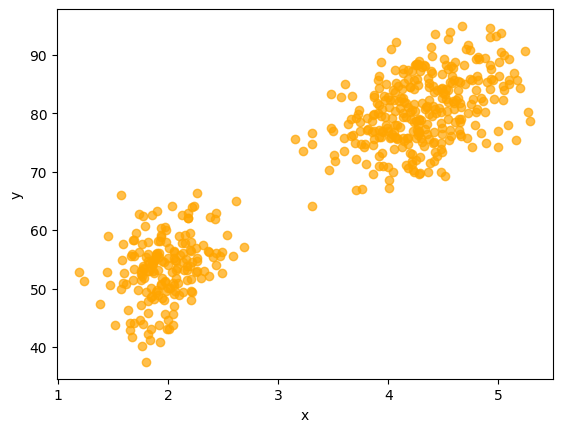

In [6]:
N = 500
xs = np.zeros((N, 2))
for i in range(N):
    xs[i] = sample()

plt.scatter(xs[:, 0], xs[:, 1], color="orange", alpha=.7)
plt.xlabel("x")
plt.ylabel("y")
plt.savefig("./result_images/old_faithful.png")
plt.show()

**GMM 수식의 유도**
$$ p(z=k;\phi) = \phi_k $$
- phi는 범주형 분포로 여러개의 정규분포중 특정 다변량 정규분포를 선택할 확률을 뜻함. 확률이니까 당연히 더해서 전부1, 0~1사이의 값을 가지는 공리를 만족해야겠지..?
$$ p(x | z = k; \mu, \Sigma) = \N(x;\mu _{k},\Sigma _{k}) $$
- 만약 z = k 라면, x가 따르는 확률 분포는 k번째 mu vector와 cov matrix를 가지는 다변량 정규분포가 됨.
$$ p(x) = \sum_{k=1}^{K} p(x, z=k) $$
- p(x)는 p(x, z)에서 z를 integrating out 시킴으로써 다음과 같이 표현됨, 그다음 결합확률을 확률의 곱셈정리에 따라 풀어주면..
$$ p(x, z = k) = p(z = k) p(x | z = k) = \phi _{k} N(x; \mu _{k}, \Sigma _{k}) $$
- 이와 같이 표현되는 것을 확인할 수 있음. 이건 k번째 다변량 정규분포에 대한 식이므로, Sigma를 통해 z를 Integrating Out을 해주면..
$$ p(x) = \sum_{k=1}^{K} \phi _{k} N(x;\mu _{k},\Sigma _{k}) $$
- 최종 p(x)는 이와 같이 표현됨.

$$ \Leftrightarrow p(x) = \sum_{k=1}^{K} \phi _{k} \frac{1}{\sqrt{(2 \pi)^D |\Sigma_{k}|}} \exp \left( -\frac{1}{2} (x - \mu_{k})^T \Sigma_{k}^{-1} (x - \mu_{k}) \right)  $$

- 즉, 여러개의 Gaussaian분포의 pdf의 가중합으로 분포가 형성된다는 것을 알 수 있음.

In [8]:
import numpy as np
import matplotlib.pyplot as plt

mus = np.array([[2, 54.50], [4.3, 80.0]])
covs = np.array([[[.07, .44], [.44, 33.7]], [[.17, .94], [.94, 36.0]]])
phis = np.array([.35, .65])

def multivariate_normal(x, mu, cov):
    det = np.linalg.det(cov)
    inv = np.linalg.inv(cov)
    d = len(x)
    z = 1 / np.sqrt((2 * np.pi) ** d * det)
    return z * np.exp(-.5 * (x - mu).T @ inv @ (x - mu))

def gmm(x, phis, mus, covs):
    K = len(phis)
    y = 0
    for k in range(K):
        phi, mu, cov = phis[k], mus[k], covs[k]
        y += phi * multivariate_normal(x, mu, cov)
    return y

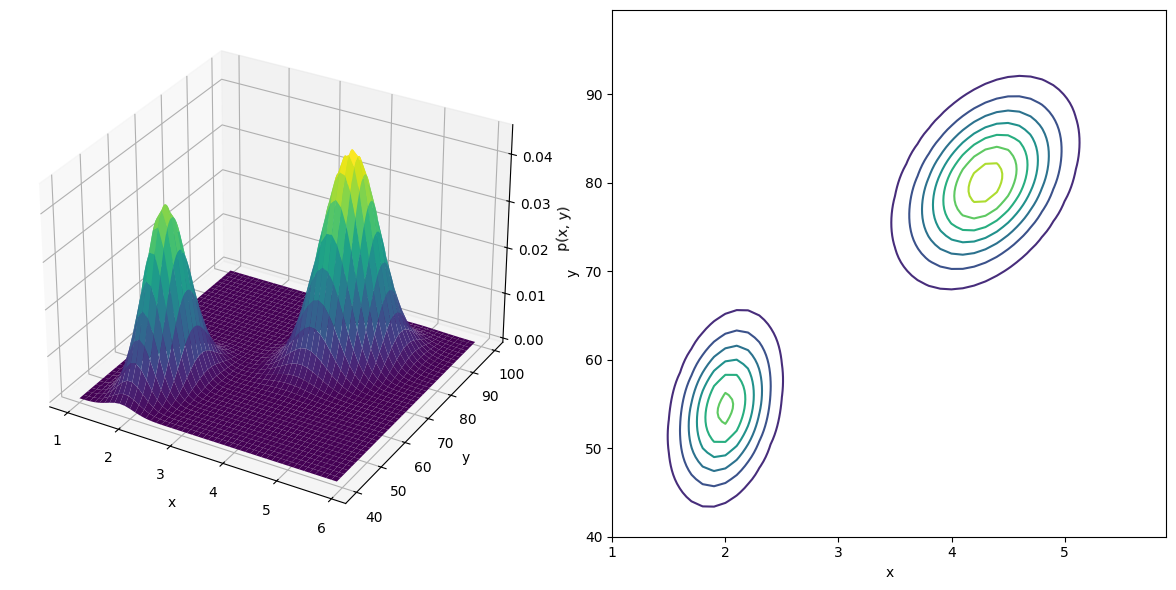

In [12]:
xs = np.arange(1, 6, .1)
ys = np.arange(40, 100, .5)
X, Y = np.meshgrid(xs, ys)
Z = np.zeros(X.shape)

for i in range(X.shape[0]):
    for j in range(X.shape[1]):
        x = np.array([X[i, j], Y[i, j]])
        Z[i, j] = gmm(x, phis, mus, covs)

fig = plt.figure(figsize=(12, 6))
ax1 = fig.add_subplot(1, 2, 1, projection="3d")
ax1.set_xlabel("x")
ax1.set_ylabel("y")
ax1.set_zlabel("p(x, y)")
ax1.plot_surface(X, Y, Z, cmap="viridis")

ax2 = fig.add_subplot(1, 2, 2)
ax2.set_xlabel("x")
ax2.set_ylabel("y")
ax2.contour(X, Y, Z, cmap="viridis")
plt.tight_layout()
plt.savefig("./result_images/gmm-with-3d.png")
plt.show()